# Test Model
---
Test the trained paramterized neural network for diffent edge cases and look at its performance.

### Import Modules

In [4]:
# extern modules
import torch
import numpy as np
import matplotlib.pyplot as plt

# intern modules
from PNN_model_1d import ParameterizedNeuralNet

## 1) Load the Model

In [5]:
# path to file
PATH: str = "../trained_models/PNN_1d.pth"

# load model from 
model = ParameterizedNeuralNet()
PNN_state_dict = torch.load(PATH)
model.load_state_dict(PNN_state_dict)

<All keys matched successfully>

## 2) Test Some Examples of th PNN

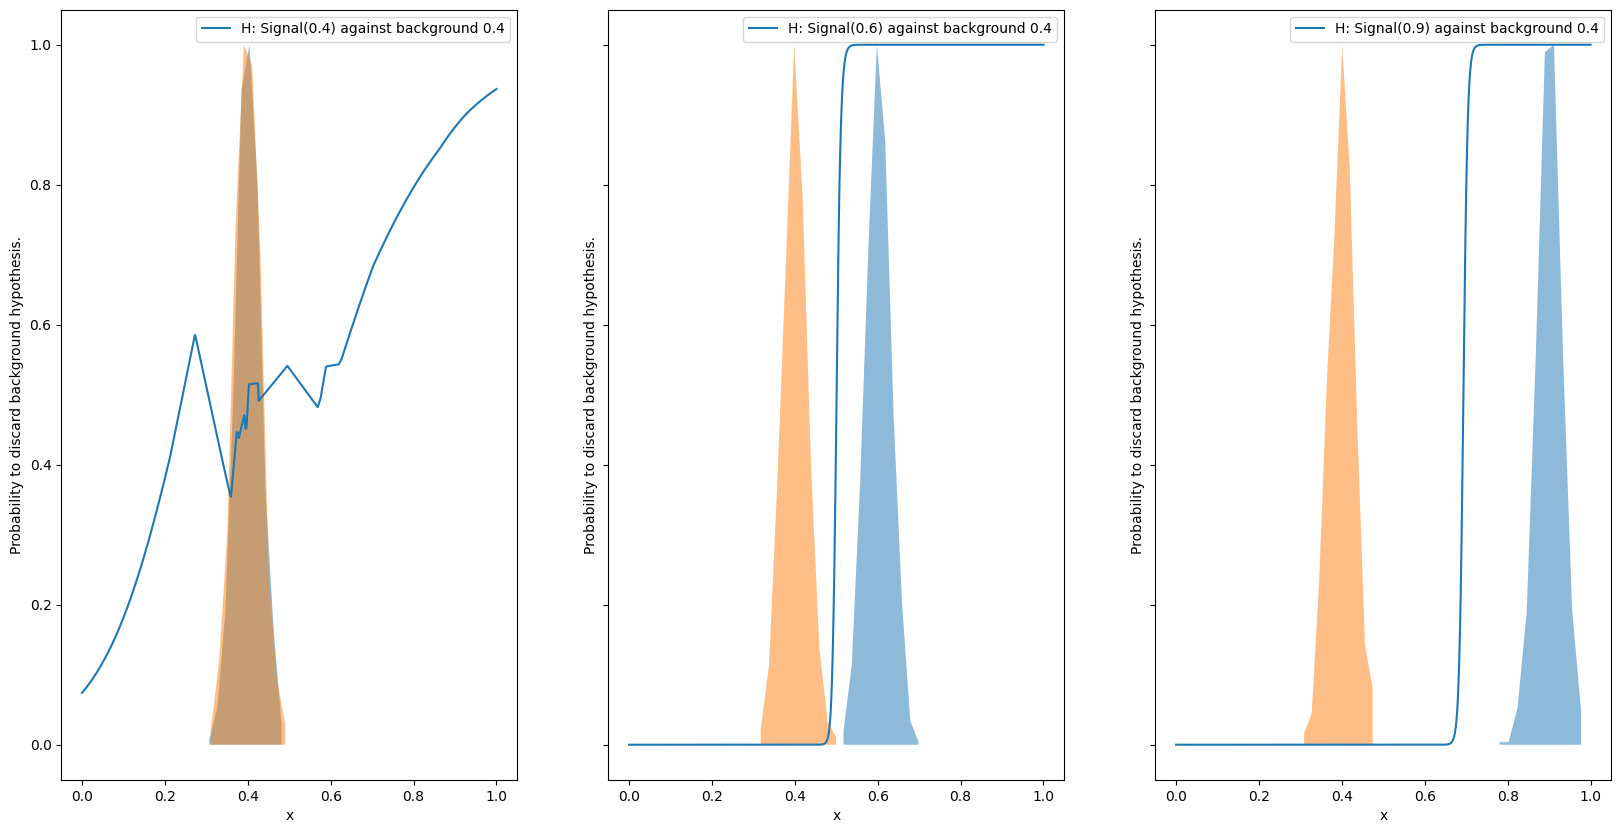

In [6]:
# trained range
x_range = np.linspace(0.00, 1.00, 1000)

# background and signals
bg = 0.400
signals = [0.4, 0.600, 0.900]

# different subplots for the results
fig, axes = plt.subplots(ncols=len(signals), sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)

# iterating through the binary classification processes

for signal_idx, signal in enumerate(signals):

    # generating background and hypothesis
    hypothesis = np.ones_like(x_range) * signal
    background = np.ones_like(x_range) * bg

    # creation data vector for the PNN
    data = np.empty((1000, 3))
    data[:, 0] = x_range
    data[:, 1] = background
    data[:, 2] = hypothesis

    # pushing to tensor format
    data_tensor = torch.tensor(data).float()

    # model evaluation
    res = model(data_tensor).detach().numpy()

    # histograms
    counts_signals, bins_signal = np.histogram(np.random.normal(loc=signal, scale=0.03, size=1000), bins = 10)
    counts_bg, bins_bg = np.histogram(np.random.normal(loc=bg, scale=0.03, size=1000), bins = 10)
    
    # centeralizing the bins
    bins_center_bg = (bins_bg[1:] + bins_bg[:-1])/2
    bins_center_signal = (bins_signal[1:] + bins_signal[:-1])/2

    # normalizing the counts
    counts_signals = counts_signals/counts_signals.max()
    counts_bg = counts_bg/counts_bg.max()

    axes[signal_idx].fill_between(bins_center_signal, counts_signals, alpha=0.5)
    axes[signal_idx].fill_between(bins_center_bg, counts_bg, alpha=0.5)

    axes[signal_idx].plot(x_range, res, label=f"H: Signal({signal}) against background {bg}")
    axes[signal_idx].set_ylabel("Probability to discard background hypothesis.")
    axes[signal_idx].set_xlabel("x")
    axes[signal_idx].legend()

plt.show()